episode  0 score -51.14 average score -51.14 completed 0 epsilon 1.00
episode  50 score -52.69 average score -39.24 completed 4 epsilon 0.01
episode  100 score -51.64 average score -35.94 completed 6 epsilon 0.01
episode  150 score -51.43 average score -35.94 completed 4 epsilon 0.01
episode  200 score -49.22 average score -33.04 completed 8 epsilon 0.01
episode  250 score -52.04 average score -30.06 completed 6 epsilon 0.01
episode  300 score -51.39 average score -34.52 completed 5 epsilon 0.01
episode  350 score -51.68 average score -26.71 completed 11 epsilon 0.01
episode  400 score 100.00 average score -16.21 completed 12 epsilon 0.01
episode  450 score -49.28 average score -16.21 completed 11 epsilon 0.01
episode  500 score -51.12 average score -17.59 completed 11 epsilon 0.01
episode  550 score 100.00 average score -5.64 completed 19 epsilon 0.01
episode  600 score 100.00 average score 1.80 completed 16 epsilon 0.01
episode  650 score 100.00 average score -11.98 completed 10 epsi

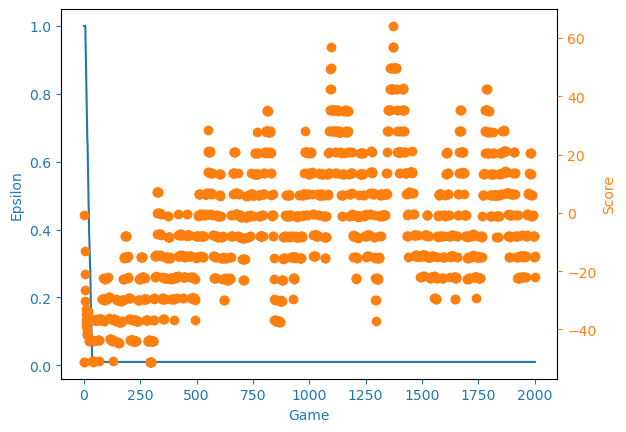

In [1]:
import gym
import numpy as np
from DQN import Agent
from disc_env import DiffDriveEnv
from utils import plotLearning

def convert_observation(dictonary):
    observation = np.zeros(6, dtype=np.float32)
    observation[0:3] = dictonary['agent']
    observation[3:4] = dictonary['target']
    observation[5] = dictonary['time']
    return observation

if __name__ == '__main__':  
    env = DiffDriveEnv()
#     env.render_mode = "human"
    get = ['agent', 'target', 'time']

    agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[6], lr=0.0003)
    scores, eps_history = [], []
    n_games = 2000
    finished = 0
    for i in range(n_games):
        observation = np.zeros(6, dtype=np.float32)
        score = 0
        
        done = False
        observation, info = env.reset()     
        observation = convert_observation(observation)
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info, completed = env.step(action)
            observation_ = convert_observation(observation_)
            agent.store_transition(observation, action, reward, 
                                    observation_, done)
            agent.learn()
            observation = observation_
        scores.append(reward)
        if completed: 
            finished +=1;
        eps_history.append(agent.epsilon)
        avg_score = np.mean(scores[-100:])
        if i % 50 == 0:
            print('episode ', i, 'score %.2f' % reward,
                    'average score %.2f' % avg_score, 'completed %d' % finished,
                    'epsilon %.2f' % agent.epsilon)
            finished = 0

    x = [i+1 for i in range(n_games)]
    filename = 'score.png'
    plotLearning(x, scores, eps_history, filename)

In [ ]:
env.render_mode = "human"
observation, info = env.reset() 

In [ ]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")